# CSCI-537 Final Project
# CAPTCHA Solver
### Fall 2021
### Hayden Sather, Jake Pinkston

#### Dependencies
pip3 install idx2numpy  
pip3 install python-mnist

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import string

import emnist

In [2]:
test = [str(x) for x in range(10)] + list(string.ascii_lowercase)
print(test)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [3]:
# Load emnist data
train_X, train_y = emnist.extract_training_samples("bymerge")
test_X, test_y = emnist.extract_test_samples("bymerge")

num_classes = 47

train_X = train_X.astype("float32") / 255
train_X = np.expand_dims(train_X, -1)
test_X = test_X.astype("float32") / 255
test_X = np.expand_dims(test_X, -1)

train_y = keras.utils.to_categorical(train_y, num_classes)
test_y = keras.utils.to_categorical(test_y, num_classes)

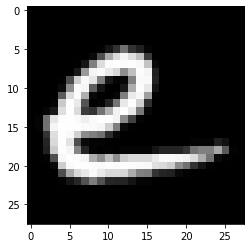

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


36

In [4]:
# TODO: Create an algorithm to decode from int to char value.

# Show image
img_num = 1
image = train_X[img_num]
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()
print(train_y[img_num])
np.nonzero(train_y[img_num])[0][0]


In [9]:
def get_model(retrain=False):
    if not retrain:
        return keras.models.load_model("model.keras")

    input_shape = (28, 28, 1)

    model = keras.Sequential([keras.Input(shape=input_shape),
                            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                            layers.MaxPooling2D(pool_size=(2, 2)),
                            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                            layers.MaxPooling2D(pool_size=(2, 2)),
                            layers.Flatten(),
                            layers.Dropout(0.5),
                            layers.Dense(num_classes, activation="softmax")])
                            
    batch_size = 128
    epochs = 15
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

    model.save("model.keras")

    return model


model = get_model()




In [14]:

for img_num in range(1, 4):
    prediction = model.predict(test_X[img_num - 1 : img_num])
    print(np.argmax(prediction), np.argmax(test_y[img_num]))

0 22
22 28
28 0


In [ ]:
img = cv2.imread("samples/2b827.png")
plt.imshow(img)
